In [1]:
#Part 1.1

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('EuCitiesTemperatures.csv')
avgLatitude = df.groupby('country')['latitude'].mean().round(2)
avgLongitude = df.groupby('country')['longitude'].mean().round(2)
avgLatitude.round(2)
avgLongitude.round(2)

countryLatList = avgLatitude.index.tolist()
countryLongList = avgLongitude.index.tolist()

for ind in df.index:
    if np.isnan(df['latitude'][ind]):
        df.at[ind, 'latitude'] = avgLatitude[df['country'][ind]]
    if np.isnan(df['longitude'][ind]):
        df.at[ind, 'longitude'] = avgLongitude[df['country'][ind]]






In [2]:
#Part 1.2
modified_df = df[(df['latitude'].between(40,60)) & (df['longitude'].between(15,30))]
countries = modified_df.groupby('country').count()
maxCount = 0

for ind in countries.index:
    if countries['city'][ind] > maxCount:
        maxCount = countries['city'][ind]

print(maxCount)

countryList = []
for ind in countries.index:
    if countries['city'][ind] == maxCount:
        countryList.append(ind)

print(countryList)




9
['Poland', 'Romania']


In [3]:
#Part 1.3

noCoastline = df[(df['coastline'] == 'no') & (df['EU'] == 'yes') ]
noEU = df[(df['coastline'] == 'yes') & (df['EU'] == 'no')]
CoastlineAndEu = df[(df['coastline'] == 'yes') & (df['EU'] == 'yes')]
noCoastlineAndEu =  df[(df['coastline'] == 'no') & (df['EU'] == 'no')]

noCoastlineAvgTemp = noCoastline['temperature'].mean().round(2)
noEUAvgTemp = noEU['temperature'].mean().round(2)
CoastlineAndEuAvgTemp = CoastlineAndEu['temperature'].mean().round(2)
noCoastlineAndEuAvgTemp = noCoastlineAndEu['temperature'].mean().round(2)

for ind in df.index:
    if np.isnan(df['temperature'][ind]):
        if df['coastline'][ind] == 'yes' and df['EU'][ind] == 'yes':
            df.at[ind, 'temperature'] = CoastlineAndEuAvgTemp
        elif df['coastline'][ind] == 'no' and df['EU'][ind] == 'no':
             df.at[ind, 'temperature'] = noCoastlineAndEuAvgTemp
        elif df['coastline'][ind] == 'yes':
             df.at[ind, 'temperature'] = noEUAvgTemp
        else:
             df.at[ind, 'temperature'] = noCoastlineAvgTemp





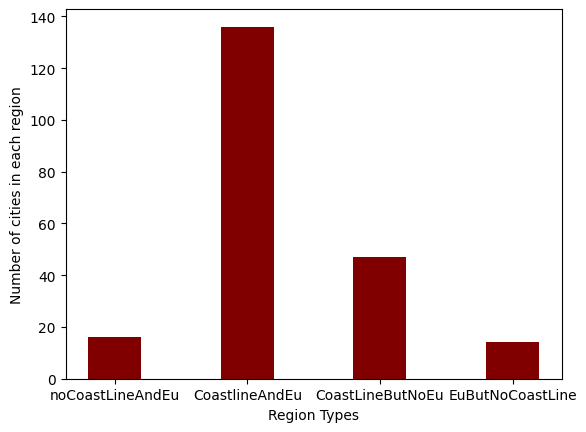

In [4]:
#Visualization
#Part 1.4

regionFrequency = {
    'noCoastLineAndEu' : 0,
    'CoastlineAndEu': 0,
    'CoastLineButNoEu': 0,
    'EuButNoCoastLine' : 0
}


for ind in df.index:
    if df['coastline'][ind] == 'yes' and df['EU'][ind] == 'yes':
        regionFrequency['CoastlineAndEu'] += 1
    elif df['coastline'][ind] == 'no' and df['EU'][ind] == 'no':
        regionFrequency['noCoastLineAndEu'] += 1
    elif df['coastline'][ind] == 'yes':
        regionFrequency['CoastLineButNoEu'] += 1
    else:
        regionFrequency['EuButNoCoastLine'] += 1


regionTypes = list(regionFrequency.keys())
frequencies = list(regionFrequency.values())
plt.bar(regionTypes, frequencies, color = 'maroon', width = 0.4)
plt.xlabel('Region Types')
plt.ylabel('Number of cities in each region')

plt.show()


In [20]:
#Visualization
#Part 1.2

countries = df.groupby('country')
modified_countries = countries.apply(lambda x: x['latitude'].unique())
print(modified_countries.head())


countries2 = df.groupby('country')
modified_countries2 = countries2.apply(lambda x: x['longitude'].unique())
print(modified_countries2.head())

country
Albania                               [41.12]
Andorra                                [42.5]
Austria    [47.85, 47.08, 48.32, 47.81, 48.2]
Belarus           [52.61, 52.1, 53.68, 52.05]
Belgium                               [51.22]
dtype: object
country
Albania                         [20.08]
Andorra                          [1.52]
Austria    [11.41, 14.02, 14.29, 16.37]
Belarus            [27.57, 25.64, 23.7]
Belgium                          [3.23]
dtype: object
